<a href="https://drive.google.com/file/d/1BbZpmOb_WPbq7D61UEeDWozTwlbVEUdd/view?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
plt.style.use('seaborn')

Read Data

In [3]:
with open("./data_cobacoba.csv", 'r') as csvfile:
    print(f"First line (header) looks like this:\n\n{csvfile.readline()}")
    print(f"Each data point looks like this:\n\n{csvfile.readline()}")

First line (header) looks like this:

STATUS;CODE_GENDER;FLAG_OWN_CAR;FLAG_OWN_REALTY;CNT_CHILDREN;AMT_INCOME_TOTAL;NAME_INCOME_TYPE;NAME_EDUCATION_TYPE;NAME_FAMILY_STATUS;NAME_HOUSING_TYPE;FLAG_WORK_PHONE;FLAG_PHONE;CNT_FAM_MEMBERS

Each data point looks like this:

good credit;M;Y;Y;0;427500;Working;Higher education;Civil marriage;Rented apartment;1;0;2



# **Open Datasets with Pandas** #

In [44]:
data  = pd.read_csv(r'./data_cobacoba.csv', delimiter=';')
data.head()

,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS
0,good credit,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,1,0,2
1,good credit,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,1,0,2
2,good credit,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,1,0,2
3,good credit,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,1,0,2
4,good credit,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,1,0,2


# **Exploratory Data Analyis (EDA)**

display a list of column

In [45]:
# column list
data.columns

Index(['STATUS', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [46]:
# statistical description of the data
data.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS
count,100000.000000,1.000000e+05,100000.000000,100000.00000,100000.000000
mean,0.402510,1.964538e+05,0.169860,0.29127,2.172480
std,0.694781,1.096283e+05,0.375512,0.45435,0.859208
min,0.000000,3.330000e+04,0.000000,0.00000,1.000000
25%,0.000000,1.314000e+05,0.000000,0.00000,2.000000
50%,0.000000,1.800000e+05,0.000000,0.00000,2.000000
75%,1.000000,2.250000e+05,0.000000,1.00000,3.000000
max,4.000000,1.350000e+06,1.000000,1.00000,6.000000


In [47]:
# additional info about data: type, number of nulls, number of rows and others
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   STATUS               100000 non-null  object
 1   CODE_GENDER          100000 non-null  object
 2   FLAG_OWN_CAR         100000 non-null  object
 3   FLAG_OWN_REALTY      100000 non-null  object
 4   CNT_CHILDREN         100000 non-null  int64 
 5   AMT_INCOME_TOTAL     100000 non-null  int64 
 6   NAME_INCOME_TYPE     100000 non-null  object
 7   NAME_EDUCATION_TYPE  100000 non-null  object
 8   NAME_FAMILY_STATUS   100000 non-null  object
 9   NAME_HOUSING_TYPE    100000 non-null  object
 10  FLAG_WORK_PHONE      100000 non-null  int64 
 11  FLAG_PHONE           100000 non-null  int64 
 12  CNT_FAM_MEMBERS      100000 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 9.9+ MB


In [48]:
# check for null counts
data.isnull().sum()

STATUS                 0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
CNT_FAM_MEMBERS        0
dtype: int64

In [49]:
# large amount of data based on Status Approval target - (bad credit-1, good credit-0)
data["STATUS"].value_counts()

good credit    50391
bad credit     49609
Name: STATUS, dtype: int64

In [50]:
# the number of rows and columns in the data
print('Total Row:', data.shape[0])
print('Total Columns:', data.shape[1])
data.shape

Total Row: 100000
Total Columns: 13


(100000, 13)

In [51]:
# defines the column category and the amount in each type
col_cat = ['STATUS', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE']
for col in col_cat :
  print(data[col].value_counts(), "\n")

good credit    50391
bad credit     49609
Name: STATUS, dtype: int64 

F    67683
M    32317
Name: CODE_GENDER, dtype: int64 

N    59902
Y    40098
Name: FLAG_OWN_CAR, dtype: int64 

Y    72547
N    27453
Name: FLAG_OWN_REALTY, dtype: int64 

Working                 50206
Commercial associate    25690
Pensioner               17149
State servant            6703
Student                   252
Name: NAME_INCOME_TYPE, dtype: int64 

Secondary / secondary special    68988
Higher education                 25655
Incomplete higher                 4271
Lower secondary                   1054
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype: int64 

Married                 69111
Single / not married    12196
Civil marriage           7874
Separated                6078
Widow                    4741
Name: NAME_FAMILY_STATUS, dtype: int64 

House / apartment      89613
With parents            4543
Municipal apartment     3068
Rented apartment        2032
Office apartment       

Convert Data Frame to List

In [52]:
# converting to list
status_list = data["STATUS"].tolist()
gender_list = data["CODE_GENDER"].tolist()
car_list = data["FLAG_OWN_CAR"].tolist()
realty_list = data["FLAG_OWN_REALTY"].tolist()
income_list = data["NAME_INCOME_TYPE"].tolist()
education_list = data["NAME_EDUCATION_TYPE"].tolist()
family_list = data["NAME_FAMILY_STATUS"].tolist()
housing_list = data["NAME_HOUSING_TYPE"].tolist()
child_total = data["CNT_CHILDREN"].tolist()
income_total = data["AMT_INCOME_TOTAL"].tolist()
workphone_total = data["FLAG_WORK_PHONE"].tolist()
phone_total = data["FLAG_PHONE"].tolist()
fam_total = data["CNT_FAM_MEMBERS"].tolist()

Create function for extracting the values in each column

In [53]:
def value_extraction(input_list):
    initial_list = []
    vnames = [name for name in globals() if globals()[name] is input_list]    
    [initial_list.append(x) for x in input_list if x not in initial_list]
    print(f"The {vnames[0]} after removing duplicates: {str(initial_list)} \n") 

In [54]:
value_extraction(status_list)
value_extraction(gender_list)
value_extraction(car_list)
value_extraction(realty_list)
value_extraction(income_list)
value_extraction(education_list)
value_extraction(family_list)
value_extraction(housing_list)
value_extraction(child_total)
value_extraction(income_total)
value_extraction(workphone_total)
value_extraction(phone_total)
value_extraction(fam_total)

The status_list after removing duplicates: ['good credit', 'bad credit'] 

The gender_list after removing duplicates: ['M', 'F'] 

The car_list after removing duplicates: ['Y', 'N'] 

The realty_list after removing duplicates: ['Y', 'N'] 

The income_list after removing duplicates: ['Working', 'Commercial associate', 'Pensioner', 'State servant', 'Student'] 

The education_list after removing duplicates: ['Higher education', 'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree'] 

The family_list after removing duplicates: ['Civil marriage', 'Married', 'Single / not married', 'Separated', 'Widow'] 

The housing_list after removing duplicates: ['Rented apartment', 'House / apartment', 'Municipal apartment', 'With parents', 'Co-op apartment', 'Office apartment'] 

The child_total after removing duplicates: [0, 1, 3, 2, 4] 

The income_total after removing duplicates: [427500, 112500, 270000, 283500, 135000, 130500, 180000, 157500, 405000, 211500, 3600

#### Encoding Categorical Features to Numerical Values ####

In [55]:
def Cat_to_Num(features):
    for feature in features:
        feature_list = list(np.unique(data[feature]))
        feature_dict = {}
        for i in range(len(feature_list)):
                       feature_dict[feature_list[i]] = i
        data.replace({feature : feature_dict}, inplace=True)
        print(feature, '-->', feature_dict)

In [56]:
categorical_features = ['STATUS','CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']
Cat_to_Num(categorical_features)

STATUS --> {'bad credit': 0, 'good credit': 1}
CODE_GENDER --> {'F': 0, 'M': 1}
FLAG_OWN_CAR --> {'N': 0, 'Y': 1}
FLAG_OWN_REALTY --> {'N': 0, 'Y': 1}
NAME_INCOME_TYPE --> {'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Student': 3, 'Working': 4}
NAME_EDUCATION_TYPE --> {'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Secondary / secondary special': 4}
NAME_FAMILY_STATUS --> {'Civil marriage': 0, 'Married': 1, 'Separated': 2, 'Single / not married': 3, 'Widow': 4}
NAME_HOUSING_TYPE --> {'Co-op apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5}


c:\Users\farid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='STATUS', ylabel='count'>

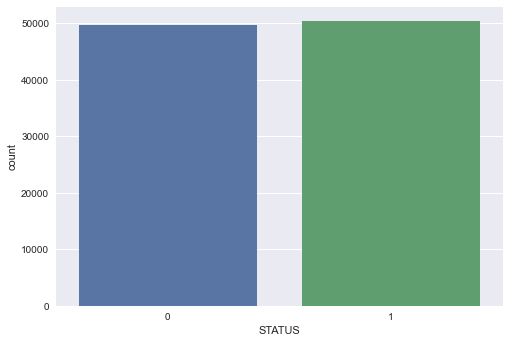

In [57]:
# display of data  distribution on Status Credit Approval - (bad credit-1, good credit-0)
sns.countplot(data['STATUS'], label="Status Credit Approval")

In [58]:
# SARS-CoV-2 Positive
# bad-credit --> 1
# good credit --> 0
data['STATUS'].unique()

array([1, 0], dtype=int64)

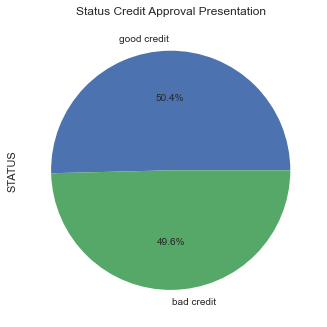

In [59]:
target = data['STATUS'].value_counts()
label =['good credit', 'bad credit']
target.plot(kind='pie', labels=label, autopct='%1.1f%%')
plt.title('Status Credit Approval Presentation')
plt.show()

C:\Users\farid\AppData\Local\Temp\ipykernel_11108\601715538.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=axs);


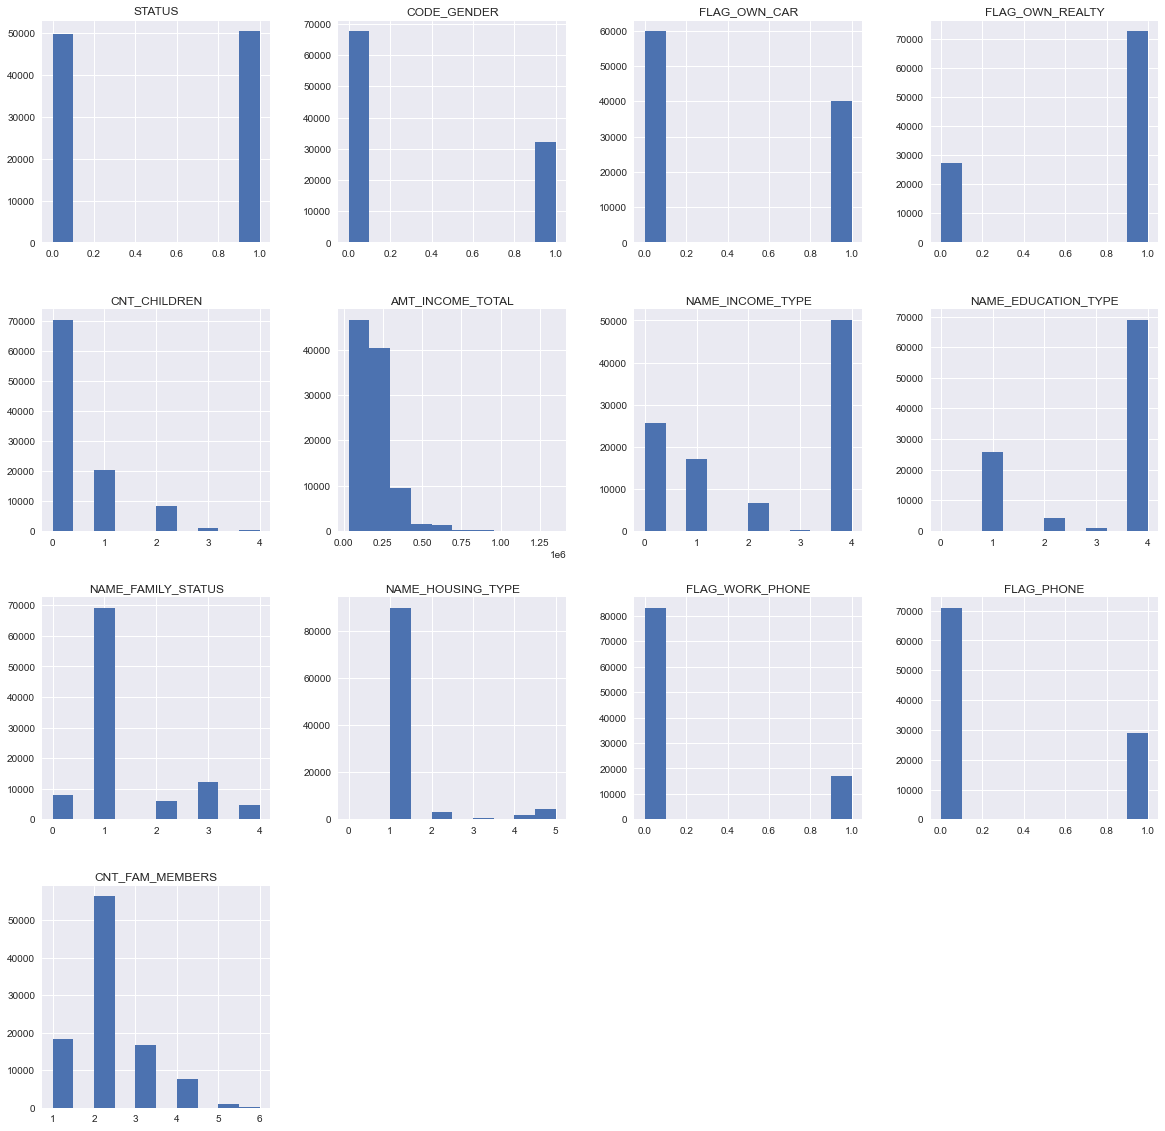

In [60]:
fig = plt.figure(figsize=(20, 20))
axs = fig.add_subplot()
data.hist(ax=axs);

<AxesSubplot:>

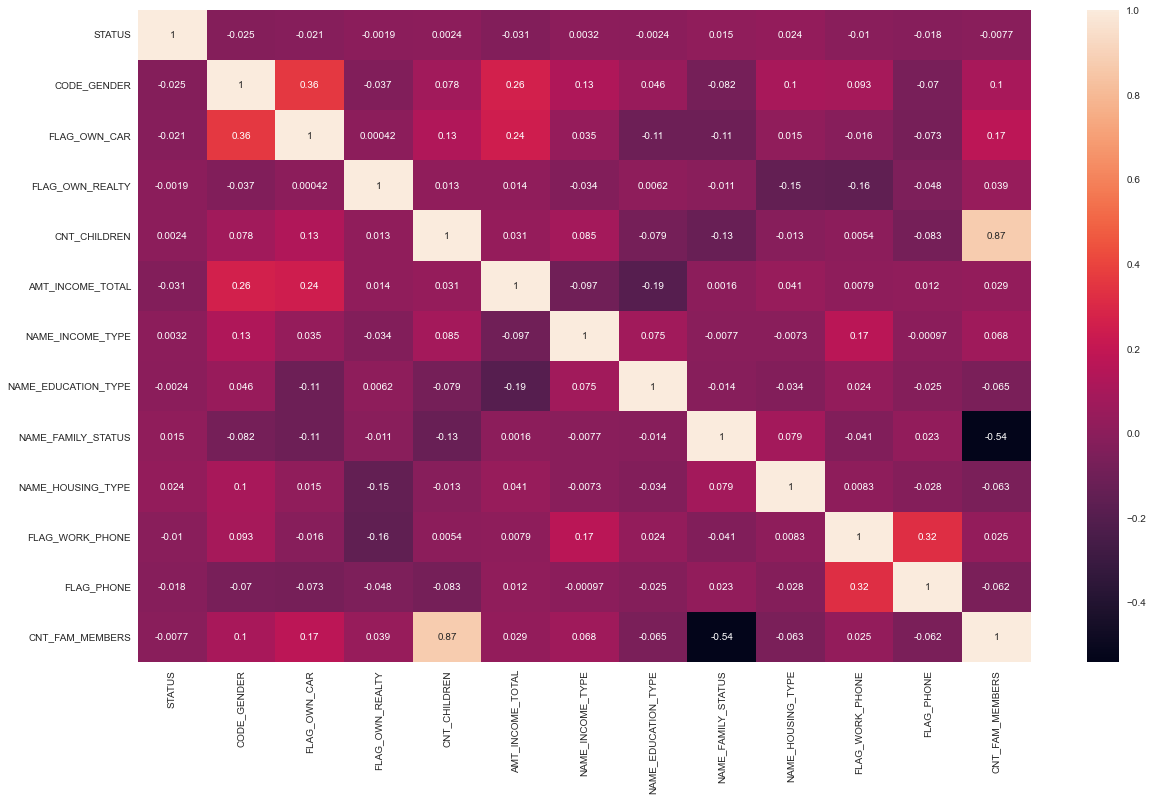

In [61]:
plt.figure(figsize=(20,12)) 
sns.heatmap(data.corr(), annot=True)

# Data cleaning
check missing value, Check duplicate value, check data type, check outlier, check typo, check imbalance data


## -- Check missing value

In [62]:
# Check missing value
data.isnull().sum()

STATUS                 0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
CNT_FAM_MEMBERS        0
dtype: int64

The method chosen to overcome missing value is the median. <br>
Reason: Columns that have a passing value have a categorical data type.

In [63]:
print("Null values : ", data.isnull().sum().sum())
print("Shape of data: ", data.shape)

Null values :  0
Shape of data:  (100000, 13)


With the replace method, it can overcome missing values without reducing data

## -- Check duplicate

In [64]:
# Check duplicate data
print("Data duplicated: ", data.duplicated().sum())

Data duplicated:  97781


## -- Check imbalance data

1    50391
0    49609
Name: STATUS, dtype: int64


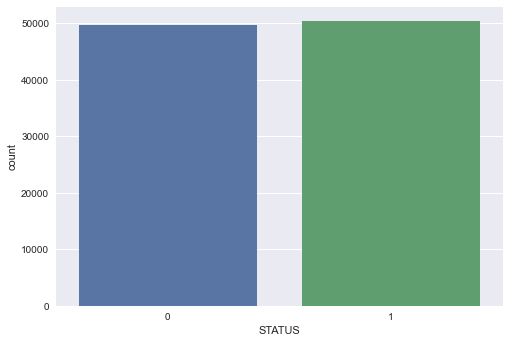

In [65]:
# Check imbalance dataset
import seaborn as sns

sns.countplot(x=data['STATUS'])
print(data['STATUS'].value_counts())

# **Data Preprocessing**

## -- Spitting features and label

In [66]:
features = data.drop(columns=['STATUS'])
label = data[['STATUS']]

print(features.shape)
print(label.shape)

features.columns, label.columns

(100000, 12)
(100000, 1)


(Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
        'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
        'FLAG_PHONE', 'CNT_FAM_MEMBERS'],
       dtype='object'),
 Index(['STATUS'], dtype='object'))

## -- Check Data type
Menyesuaikan tipe data sesuai dengan metadata yang diberikan

* **Categorical** (`gender`, `fever`, `cough`, `runny_nose`, `muscle_soreness`, `pneumonia`, `diarrhea`, `lung_infection`, `travel_history`, `isolation_treatment`, `SARS-CoV-2 Positive`)
* **Numeric** (`age_year`)

In [67]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   CODE_GENDER          100000 non-null  int64
 1   FLAG_OWN_CAR         100000 non-null  int64
 2   FLAG_OWN_REALTY      100000 non-null  int64
 3   CNT_CHILDREN         100000 non-null  int64
 4   AMT_INCOME_TOTAL     100000 non-null  int64
 5   NAME_INCOME_TYPE     100000 non-null  int64
 6   NAME_EDUCATION_TYPE  100000 non-null  int64
 7   NAME_FAMILY_STATUS   100000 non-null  int64
 8   NAME_HOUSING_TYPE    100000 non-null  int64
 9   FLAG_WORK_PHONE      100000 non-null  int64
 10  FLAG_PHONE           100000 non-null  int64
 11  CNT_FAM_MEMBERS      100000 non-null  int64
dtypes: int64(12)
memory usage: 9.2 MB


In [68]:
col_cat_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

features[col_cat_features] = features[col_cat_features].astype('category')

In [69]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   CODE_GENDER          100000 non-null  category
 1   FLAG_OWN_CAR         100000 non-null  category
 2   FLAG_OWN_REALTY      100000 non-null  category
 3   CNT_CHILDREN         100000 non-null  int64   
 4   AMT_INCOME_TOTAL     100000 non-null  int64   
 5   NAME_INCOME_TYPE     100000 non-null  category
 6   NAME_EDUCATION_TYPE  100000 non-null  category
 7   NAME_FAMILY_STATUS   100000 non-null  category
 8   NAME_HOUSING_TYPE    100000 non-null  category
 9   FLAG_WORK_PHONE      100000 non-null  int64   
 10  FLAG_PHONE           100000 non-null  int64   
 11  CNT_FAM_MEMBERS      100000 non-null  int64   
dtypes: category(7), int64(5)
memory usage: 4.5 MB


In [70]:
label_types = ['good-credit', 'bad-credit']

## -- Normalize Data

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
mx = MinMaxScaler()

In [74]:
col_features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS', 
                'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

features[col_features] = mx.fit_transform(features[col_features])
features.head(2)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS
0,1,1,1,0.0,0.299385,1.0,0.25,0.0,0.8,1.0,0.0,0.2
1,1,1,1,0.0,0.299385,1.0,0.25,0.0,0.8,1.0,0.0,0.2


## -- Split Data

In [75]:
X_train, X_validate, y_train, y_validate = train_test_split(
    features, label, test_size=0.3, shuffle=True, stratify=label)

In [77]:
X_train.shape, X_validate.shape

((70000, 12), (30000, 12))

In [76]:
print(y_train.count())
print(y_validate.count())

STATUS    70000
dtype: int64
STATUS    30000
dtype: int64


# **Data Modelling**

In [177]:
# GRADED FUNCTION: create_model
def create_model():
    
    ### START CODE HERE  
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        # tf.keras.layers.Conv1D(16, 1, activation='relu', input_shape=(X_train.shape[1:])),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        # tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation='relu'),
        # tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation='relu'),
        # tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(32, activation='relu'),
        # tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(16, activation='relu'),
        # tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(8, activation="relu"),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    
    model.compile(loss='mse',
                #   optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  metrics=['accuracy'])

    ### END CODE HERE

    return model
    
model = create_model()

In [178]:
mc = ModelCheckpoint('creditscore_model_05.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [179]:
history = model.fit(X_train, y_train, 
                    epochs=300, 
                    batch_size=16,  
                    # verbose=0, 
                    callbacks = [mc], 
                    validation_data=(X_validate, y_validate))

Epoch 1/300
4371/4375 [============================>.] - ETA: 0s - loss: 0.2491 - accuracy: 0.5402
Epoch 1: val_accuracy improved from -inf to 0.56213, saving model to creditscore_model_05.h5
4375/4375 [==============================] - 39s 9ms/step - loss: 0.2491 - accuracy: 0.5402 - val_loss: 0.2435 - val_accuracy: 0.5621
Epoch 2/300
4374/4375 [============================>.] - ETA: 0s - loss: 0.2386 - accuracy: 0.5803
Epoch 2: val_accuracy improved from 0.56213 to 0.59423, saving model to creditscore_model_05.h5
4375/4375 [==============================] - 37s 9ms/step - loss: 0.2386 - accuracy: 0.5804 - val_loss: 0.2362 - val_accuracy: 0.5942
Epoch 3/300
4372/4375 [============================>.] - ETA: 0s - loss: 0.2323 - accuracy: 0.6035
Epoch 3: val_accuracy improved from 0.59423 to 0.60087, saving model to creditscore_model_05.h5
4375/4375 [==============================] - 37s 8ms/step - loss: 0.2323 - accuracy: 0.6036 - val_loss: 0.2315 - val_accuracy: 0.6009
Epoch 4/300
4370

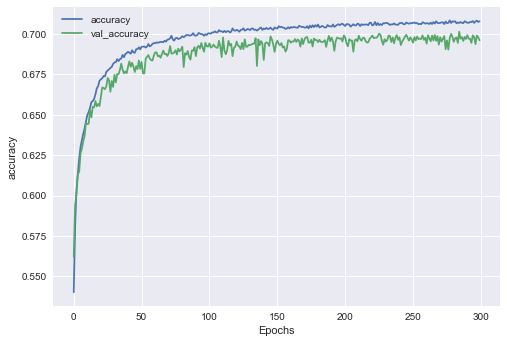

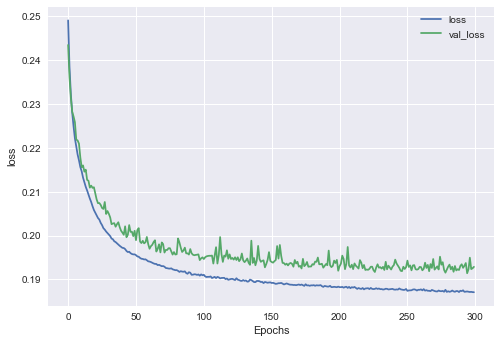

In [180]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [181]:
scores = []
score = model.evaluate(X_validate, y_validate, verbose = 1)

akurasi = score[1]
scores.append(akurasi)
y_pred = model.predict(X_validate)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_validate, y_pred)

print(cm)
print(classification_report(y_validate,y_pred))

def Average(lst):
 return sum(lst) / len(lst)

print(Average(scores))


938/938 [==============================] - 3s 3ms/step - loss: 0.1929 - accuracy: 0.6960
[[ 9220  5663]
 [ 3457 11660]]
              precision    recall  f1-score   support

           0       0.73      0.62      0.67     14883
           1       0.67      0.77      0.72     15117

    accuracy                           0.70     30000
   macro avg       0.70      0.70      0.69     30000
weighted avg       0.70      0.70      0.69     30000

0.6959999799728394


In [ ]:
predictions = model.predict(X_validate)
print(y_validate[100])
# print(predictions[100])
# print(np.round(predictions[100]))

In [ ]:
print(y_validate[10])
print(predictions[10])
print(np.round(predictions[10]))

In [202]:
new_model = tf.keras.models.load_model('./creditscore_model_05.h5')

# Check its architecture
new_model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_43 (Flatten)        (16, 12)                  0         
                                                                 
 dense_347 (Dense)           (16, 512)                 6656      
                                                                 
 dense_348 (Dense)           (16, 256)                 131328    
                                                                 
 dense_349 (Dense)           (16, 128)                 32896     
                                                                 
 dense_350 (Dense)           (16, 64)                  8256      
                                                                 
 dense_351 (Dense)           (16, 32)                  2080      
                                                                 
 dense_352 (Dense)           (16, 16)                

938/938 [==============================] - 3s 3ms/step - loss: 0.3834 - accuracy: 1.4019
[[ 9686  5197]
 [ 3763 11354]]
              precision    recall  f1-score   support

           0       0.72      0.65      0.68     14883
           1       0.69      0.75      0.72     15117

    accuracy                           0.70     30000
   macro avg       0.70      0.70      0.70     30000
weighted avg       0.70      0.70      0.70     30000

1.4019190073013306
Accuracy is: 0.7013333333333334


<AxesSubplot:>

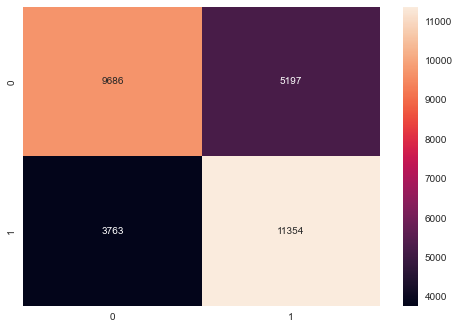

In [205]:
scores = []
score = new_model.evaluate(X_validate, y_validate, verbose = 1)

akurasi = score[1]
scores.append(akurasi)
y_pred = new_model.predict(X_validate)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_validate, y_pred)

print(cm)
print(classification_report(y_validate,y_pred))

def Average(lst):
 return sum(lst) / len(lst)

print(Average(scores))
ac= accuracy_score(y_validate, y_pred)
print('Accuracy is:', ac)
sns.heatmap(cm,annot=True,fmt='d')

## -- Experiment

### **Effect of Batch Size on Model Behavior**

In [108]:
data_sampel = data.sample(n=1000)
print(data_sampel.shape)
data_sampel.head(10)

(1000, 13)


,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS
87495,1,0,0,1,3,179100,2,4,1,1,0,0,5
69359,0,1,1,1,1,157500,0,4,1,1,0,0,3
6851,1,0,1,0,0,135000,1,4,1,1,0,1,2
96483,1,0,0,1,0,112500,1,1,1,1,0,0,2
88367,0,0,0,1,0,202500,1,3,3,1,0,0,1
13637,1,0,1,0,0,382500,4,1,1,1,1,1,2
51922,0,1,1,1,1,135000,0,1,1,1,0,0,3
87956,0,0,0,0,2,180000,2,1,1,1,1,0,4
50212,0,1,1,0,1,405000,2,4,1,1,0,0,3
89517,0,0,1,1,0,540000,4,1,2,1,0,0,1


In [109]:
features_sampel = data_sampel.drop(columns=['STATUS'])
label_sampel = data_sampel[['STATUS']]

print(features_sampel.shape)
print(label_sampel.shape)

features_sampel.columns, label_sampel.columns

(1000, 12)
(1000, 1)


(Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
        'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
        'FLAG_PHONE', 'CNT_FAM_MEMBERS'],
       dtype='object'),
 Index(['STATUS'], dtype='object'))

In [105]:
label_sampel_types = ['good-credit', 'bad-credit']

In [110]:
col_features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS', 
                'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

features_sampel[col_features] = mx.fit_transform(features_sampel[col_features])
features_sampel.head(2)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS
87495,0,0,1,0.75,0.107376,0.5,1.0,0.25,0.2,0.0,0.0,0.8
69359,1,1,1,0.25,0.090909,0.0,1.0,0.25,0.2,0.0,0.0,0.4


In [111]:
X_train_sampel, X_validate_sampel, y_train_sampel, y_validate_sampel = train_test_split(
    features_sampel, label_sampel, test_size=0.3, shuffle=True, stratify=label_sampel)

In [112]:
X_train_sampel.shape, X_validate_sampel.shape

((700, 12), (300, 12))

In [115]:
# fit a model and plot learning curve
def fit_model(X_train, y_train, X_validate, y_validate, n_batch):
  model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')
    ])
  model.compile(loss='mse',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    metrics=['accuracy'])
  
  history = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=50, batch_size=n_batch, verbose=0)

  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.ylim(top=1)
  plt.title('batch='+str(n_batch))
  plt.legend()


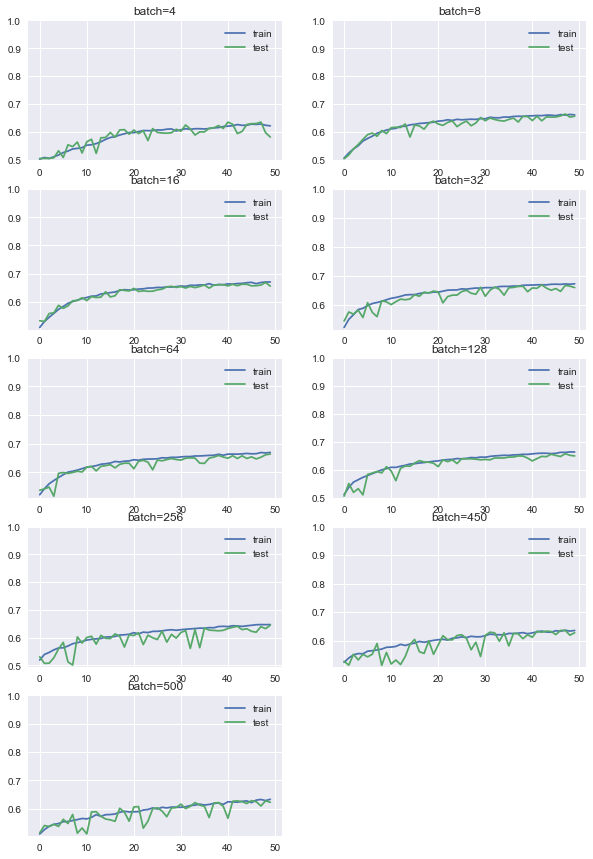

In [116]:
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450, 500]

plt.figure(figsize=(10, 15))
for i in range(len(batch_sizes)):
    
    # determine the plot number
    plot_no = 520 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a batch size
    fit_model(X_train, y_train, X_validate, y_validate, batch_sizes[i])

# show learning curves
plt.show()

### **Effect of Epoch on Model Behavior**

In [ ]:
# fit a model and plot learning curve
def fit_model(X_train, y_train, X_validate, y_validate, n_epoch):
  model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')
    ])
  model.compile(loss='mse',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    metrics=['accuracy'])
  
  history = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=n_epoch, batch_size=64, verbose=0)

  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.ylim(top=1)
  plt.title('Epoch='+str(n_epoch))
  plt.legend()


In [ ]:
epoch_sizes = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

plt.figure(figsize=(10, 20))
for i in range(len(epoch_sizes)):
    
    # determine the plot number
    plt.subplot(5, 2, i+1)
    
    # fit model and plot learning curves for a batch size
    fit_model(X_train, y_train, X_validate, y_validate, epoch_sizes[i])

# show learning curves
plt.show()

### **Summary Effect of Epoch and Batch Size on Model Behavior**

In [ ]:
# fit a model and plot learning curve
def fit_model(X_train, y_train, X_validate, y_validate, n_batch, n_epoch):
  model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')
    ])
  model.compile(loss='mse',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    metrics=['accuracy'])
  
  history = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=n_epoch, batch_size=n_batch, verbose=0)
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.ylim(top=1)
  plt.title('Epoch = '+str(n_epoch))
  plt.legend()


In [ ]:
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450, 500]
epoch_sizes = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for batch in batch_sizes:
  print("Batch = ", batch)
  plt.figure(figsize=(10, 20))
  for i in range(len(epoch_sizes)):
    # determine the plot number
    plt.subplot(5,2,i+1)
    
    # fit model and plot learning curves for a batch size
    fit_model(X_train, y_train, X_validate, y_validate, batch, epoch_sizes[i])
  # show learning curves
  plt.show()

### **Effect of Activation Function on Model Behavior**

In [117]:
# fit a model and plot learning curve
def fit_model(X_train, y_train, X_validate, y_validate, activations, output_activations):
  model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=activations),
        tf.keras.layers.Dense(256, activation=activations),
        tf.keras.layers.Dense(128, activation=activations),
        tf.keras.layers.Dense(64, activation=activations),
        tf.keras.layers.Dense(32, activation=activations),
        tf.keras.layers.Dense(16, activation=activations),
        tf.keras.layers.Dense(8, activation=activations),
        tf.keras.layers.Dense(1, activation=output_activations)
    ])
  model.compile(loss='mse',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    metrics=['accuracy'])
  
  history = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=200, batch_size=128, verbose=0)
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.ylim(top=1)
  plt.title('Activations = '+activations+ ', output = '+output_activations)
  plt.legend()


In [ ]:
activations = ["relu", "tanh"]
output_activations = ["sigmoid", "linear"]

for activation in activations:
  print("Activation = ", activation)
  plt.figure(figsize=(10, 20))
  for i in range(len(output_activations)):
    # determine the plot number
    plt.subplot(5,2,i+1)
    
    # fit model and plot learning curves for a activation size
    fit_model(X_train, y_train, X_validate, y_validate, activation, output_activations[i])
  # show learning curves
  plt.show()

### **Effect of Loss Functions on Model Behavior**

In [133]:
# fit a model and plot learning curve
def fit_model(X_train, y_train, X_validate, y_validate, loss):
  model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')
    ])
  model.compile(loss=loss,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])
  
  history = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=100, batch_size=16, verbose=0)

  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.ylim(top=1)
  plt.title('Loss='+str(loss))
  plt.legend()


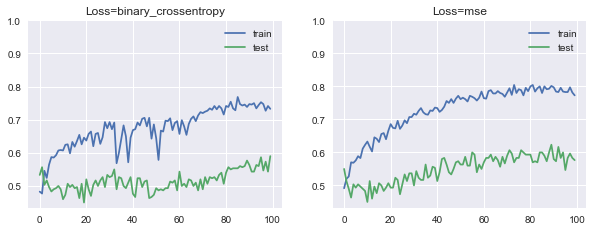

In [134]:
loss = ["binary_crossentropy", "mse"]

plt.figure(figsize=(10, 20))
for i in range(len(loss)):
    
    # determine the plot number
    plt.subplot(5, 2, i+1)
    
    # fit model and plot learning curves for a batch size
    fit_model(X_train_sampel, y_train_sampel, X_validate_sampel, y_validate_sampel, loss[i])

# show learning curves
plt.show()

### **Effect of Optimizer on Model Behavior**

In [127]:
# fit a model and plot learning curve
def fit_model(X_train, y_train, X_validate, y_validate, n_batch, optimizer):
  model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')
    ])
  model.compile(loss='mse',
    optimizer=optimizer,
    metrics=['accuracy'])

  history = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=100, batch_size=n_batch, verbose=0)
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.ylim(top=1)
  plt.title('optimizer = '+str(optimizer))
  plt.legend()


Batch =  4


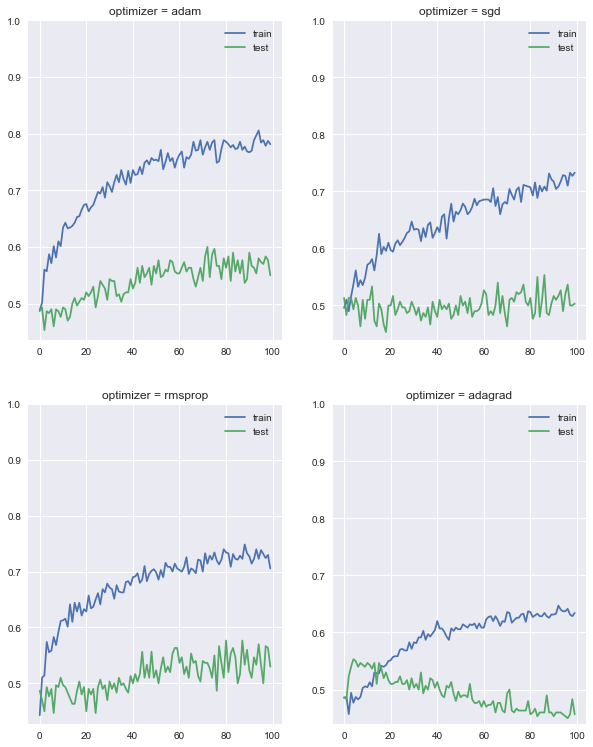

In [128]:
# batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450, 500]
batch_sizes = [4]
# optimizer = ['adam', 'sgd', 'rmsprop', 'adagrad']
optimizer = ['adam', 'sgd', 'rmsprop', 'adagrad']

for batch in batch_sizes:
  print("Batch = ", batch)
  plt.figure(figsize=(10, 20))
  for i in range(len(optimizer)):
    # determine the plot number
    plt.subplot(3,2,i+1)
    
    # fit model and plot learning curves for a batch size
    fit_model(X_train_sampel, y_train_sampel, X_validate_sampel, y_validate_sampel, batch, optimizer[i])
  # show learning curves
  plt.show()

# **Convert Model to TFLite** 

In [218]:
new_model = tf.keras.models.load_model('./creditscore_model_05.h5')

# Check its architecture
new_model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_43 (Flatten)        (16, 12)                  0         
                                                                 
 dense_347 (Dense)           (16, 512)                 6656      
                                                                 
 dense_348 (Dense)           (16, 256)                 131328    
                                                                 
 dense_349 (Dense)           (16, 128)                 32896     
                                                                 
 dense_350 (Dense)           (16, 64)                  8256      
                                                                 
 dense_351 (Dense)           (16, 32)                  2080      
                                                                 
 dense_352 (Dense)           (16, 16)                

In [220]:
CREDIT_SCORE_SAVED_MODEL = "exp_credit_score_saved_model-05"

In [221]:
tf.saved_model.save(new_model, CREDIT_SCORE_SAVED_MODEL)

INFO:tensorflow:Assets written to: exp_credit_score_saved_model-05\assets


In [222]:
loaded = tf.saved_model.load(CREDIT_SCORE_SAVED_MODEL)

In [223]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'flatten_43_input': TensorSpec(shape=(16, 12), dtype=tf.float64, name='flatten_43_input')})
{'dense_354': TensorSpec(shape=(16, 1), dtype=tf.float32, name='dense_354')}


In [224]:
converter = tf.lite.TFLiteConverter.from_saved_model(CREDIT_SCORE_SAVED_MODEL)

converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [225]:
tflite_model = converter.convert()
tflite_model_file = 'credit_score_model-05.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

ConverterError: <unknown>:0: error: loc(callsite(callsite(fused["Cast:", "sequential_43/flatten_43/Cast@__inference__wrapped_model_34598387"] at fused["StatefulPartitionedCall:", "StatefulPartitionedCall@__inference_signature_wrapper_34599152"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall"])): 'tf.Cast' op is neither a custom op nor a flex op
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall"]): called from
<unknown>:0: note: loc(callsite(callsite(fused["Cast:", "sequential_43/flatten_43/Cast@__inference__wrapped_model_34598387"] at fused["StatefulPartitionedCall:", "StatefulPartitionedCall@__inference_signature_wrapper_34599152"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall"])): Error code: ERROR_NEEDS_FLEX_OPS
<unknown>:0: error: failed while converting: 'main': 
Some ops are not supported by the native TFLite runtime, you can enable TF kernels fallback using TF Select. See instructions: https://www.tensorflow.org/lite/guide/ops_select 
TF Select ops: Cast
Details:
	tf.Cast(tensor<16x12xf64>) -> (tensor<16x12xf32>) : {Truncate = false, device = ""}

